In [1912]:
#Importing all required libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
from sklearn import tree
from os import system
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [1913]:
#Read the data as a data frame using pandas.
BankRaw = pd.read_csv('bank-full.csv')
print(BankRaw.columns)
#Shape of the data
print(BankRaw.shape)
BankRaw.head(10)
#Inference: The data set has 45211 data records spread across 17 column types

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')
(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [1914]:
# Checking for Data type of each attribute
#If attribute types are not correct appropriate actions needs to be taken.
BankRaw.info()
BankRaw.dtypes
#Inference: 
# job,marital,education,default,housing,loan,contact,month,poutcome,target are categorical variables of data type 'object' 
#and hence needs to be represented in binary/integer format.We will take the necessary action needed for these categorical variables in subsequent steps
#age, balance, day,duration,campain,pdays,previous are continuous variables holding intiger values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [1915]:
BankRaw.describe().transpose()
#Inference: All numeric columns are described in below table. I could make below observations:
#1."balance" has -ve values, which ideally means customer owns loan from bank. This needs further analysis
#2. As there is huge difference between 75% and max w.r.t "campaign" column, I could sense presence of outliers here. This needs further analysis
#3."pdays" column displays -ve value which cannot be the case in real scenario. Also 75% and max indicates presence of outliers.
#This needs further analysis as well.
#4. difference between 75% and max is huge w.r.t "previous" column, could anticipate outliers here. This needs further analysis

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [1916]:
# Checking the presence of missing values.
BankRaw.isnull().values.any(),BankRaw.isna().values.any(),BankRaw.isna().sum()
# Below data indicates that there are no null and NAN values. All values are present.

(False, False, age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 Target       0
 dtype: int64)

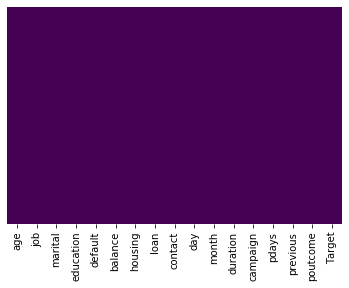

In [1917]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(BankRaw.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#So based on below outcome and previous analysis, we can conclude that there is no null or NAN values present in the data set.

In [1918]:
#Plots and checking for class imbalance in below steps and printing insights
# We will also check for the presence of outliers based on the visualization and simultaneously print the 
#5 point summary for each variable

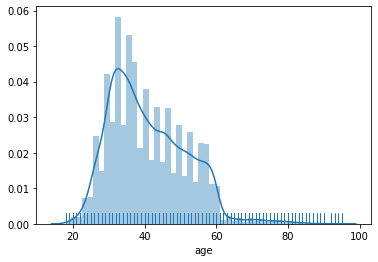

In [1919]:
#Analyzing the distribution of independent variables one by one below. 
#Let's analyze numeric variables first
sns.distplot(BankRaw['age'], rug=True)
#Inference: Age has multiple modes and it is slightly right skewed which indicates outliers. 
#Data has heavy representation of customers with age between 20-60 years and less spread across other age groups

In [1920]:
BankRaw.age.median(),BankRaw.age.describe()
#Mean and Median for age are almost same. So we can summarize as below:
#5 point summary: 
#Based on below result five point summary would look as below:(Considered Q1 is 25% and Q3 is 75%)
#age: min-18, Q1-33,median-39, Q3-48, max-95

(39.0, count    45211.000000
 mean        40.936210
 std         10.618762
 min         18.000000
 25%         33.000000
 50%         39.000000
 75%         48.000000
 max         95.000000
 Name: age, dtype: float64)

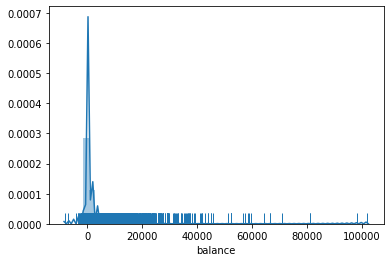

In [1921]:
sns.distplot(BankRaw['balance'], rug=True)
#Inference: balance right skewed which indicates outliers. Also it has negetive values. This needs further action
#Most of the data is spread across the customers who has balance within 5000 (euros)

In [1922]:
#5 point summary: 
BankRaw.balance.median(),BankRaw.balance.describe()
#Based on below result five point summary would look as below:(Considered Q1 is 25% and Q3 is 75%)
#balance: min -8019.00, Q1-72,median-448, Q3-1428, max-102127
# Balance >5000 can be considered as outliers in the above graph which will be replaced in later steps

(448.0, count     45211.000000
 mean       1362.272058
 std        3044.765829
 min       -8019.000000
 25%          72.000000
 50%         448.000000
 75%        1428.000000
 max      102127.000000
 Name: balance, dtype: float64)

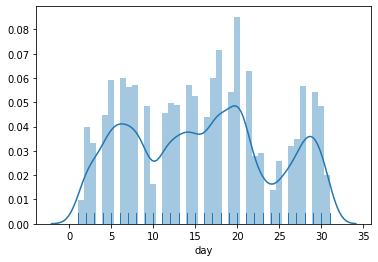

In [1923]:
sns.distplot(BankRaw['day'], rug=True)
#Inference: day has multiple modes and data is somewhat symmetrically distributed across all days of month
#No outliers present

In [1924]:
BankRaw.day.median(),BankRaw.day.describe()
#5 point summary: 
#Based on below result five point summary would look as below:(Considered Q1 is 25% and Q3 is 75%)
#balance: min 1, Q1-8,median-16, Q3-21, max-31.
#No outliers or negetive values are found hence no further action is needed on this variable

(16.0, count    45211.000000
 mean        15.806419
 std          8.322476
 min          1.000000
 25%          8.000000
 50%         16.000000
 75%         21.000000
 max         31.000000
 Name: day, dtype: float64)

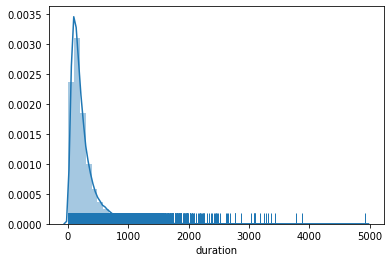

In [1925]:
sns.distplot(BankRaw['duration'], rug=True)
#Inference: duration is highly right skewed and shows the presence of outliers. 
#Data is mostly spread across duration of between 0-800(secs)

In [1926]:
#5 point summary: 
BankRaw.duration.median(),BankRaw.duration.describe()
#Based on below result five point summary would look as below:(Considered Q1 is 25% and Q3 is 75%)
#duration: min 0, Q1-103,median-180, Q3-319, max-4918.
#Shows the presence of outliers as max value is much more greater than 75%. Needs further analysis

(180.0, count    45211.000000
 mean       258.163080
 std        257.527812
 min          0.000000
 25%        103.000000
 50%        180.000000
 75%        319.000000
 max       4918.000000
 Name: duration, dtype: float64)

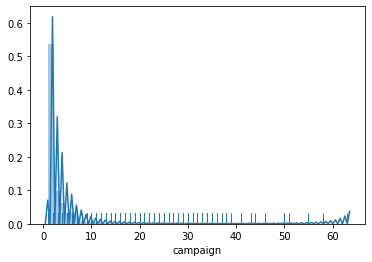

In [1927]:
sns.distplot(BankRaw['campaign'], rug=True)
#Inference: campaign is highly right skewed and shows the presence of outliers. 
#Data is mostly spread across campain ranging between 0-8

In [1928]:
#5 point summary: 
BankRaw.campaign.median(),BankRaw.campaign.describe()
#Based on below result five point summary would look as below:(Considered Q1 is 25% and Q3 is 75%)
#campaign: min 1, Q1-1,median-2, Q3-3, max-63.
#Shows the presence of outliers as max value is much more greater than 75%. Needs further analysis

(2.0, count    45211.000000
 mean         2.763841
 std          3.098021
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max         63.000000
 Name: campaign, dtype: float64)

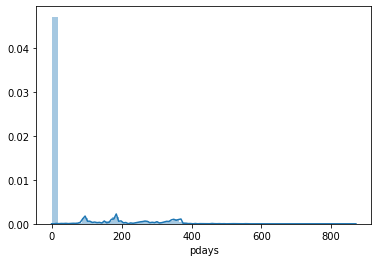

In [1929]:
sns.distplot(BankRaw['pdays'])
#Inference: pdays is highly right skewed and shows the presence of outliers.
#Data is heavily concentrated around 0 value of pdays. Needs further analysis

In [1930]:
#5 point summary: 
BankRaw.pdays.median(),BankRaw.pdays.describe()
#Based on below result five point summary would look as below:(Considered Q1 is 25% and Q3 is 75%)
#pdays: min -1, Q1 -1,median -1, Q3 -1, max 871.
#Shows the presence of extreme outliers. 
#Also this variable indicates that days completed after the previous contact has been made with the customer, 
#the  presence of -ve values does not make any sense. 
#In other way I feel we can assume that -ve value indicates that no contact has been made in previous campaign
#This assumption will contradict the note provided in assignment: '999 means client was not previously contacted'.
#But value 999 does not exist in the data set against this variable which means that we can proceed with our assumption
# ""-ve value indicates that no contact has been made in previous campaign"
#Later we will analyze the relatioship of this column with another column 'previous' 
#which indicates if customer has been contacted previously or not

(-1.0, count    45211.000000
 mean        40.197828
 std        100.128746
 min         -1.000000
 25%         -1.000000
 50%         -1.000000
 75%         -1.000000
 max        871.000000
 Name: pdays, dtype: float64)

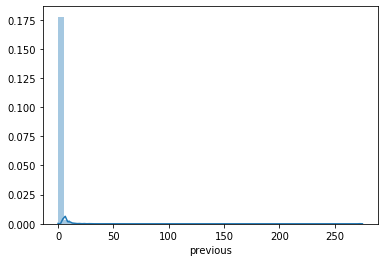

In [1931]:
sns.distplot(BankRaw['previous'])
#Inference: previous is right skewed and shows the presence of outliers. 
#Data is heavily concentrated around 0 value of previous

In [1932]:
#5 point summary: 
BankRaw.previous.median(),BankRaw.previous.describe()
#Based on below result five point summary would look as below:(Considered Q1 is 25% and Q3 is 75%)
#previous: min 0, Q1 0,median 0, Q3 0, max 275.
#Shows the presence of outliers as max value is much more greater than 75%. Needs further analysis

(0.0, count    45211.000000
 mean         0.580323
 std          2.303441
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max        275.000000
 Name: previous, dtype: float64)

In [1933]:
#5-point summary of numeric variables are complated above
#Analyzing categorical variables one by one below to check the distribution pattern

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

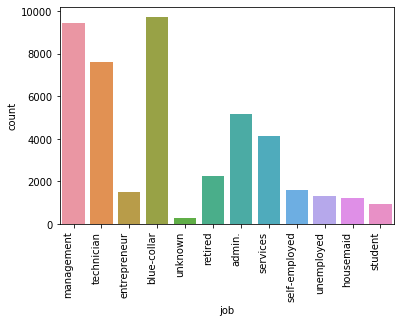

In [1934]:
chart=sns.countplot(BankRaw['job'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
# Inference: Data is heavily distributed across job types-management,technician,blue-collar, 
# moderately distributed across job types-admin,services and least distributed across job types- entrepreneur,unknown,
#retired,self-employed,unemployed,housemaid,student.
# Job has 'unknown' as one of category. 
#As this is very negligible when compared to other categories, we will retain it as it is

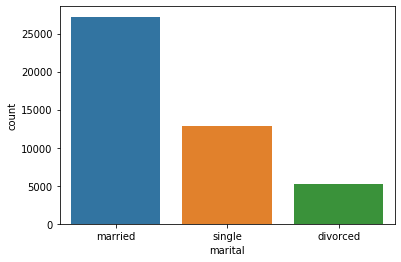

In [1935]:
sns.countplot(BankRaw['marital'])
#Inference: Data has more representation of married customers, moderate distribution of single customers and 
#least representation of divorced customers

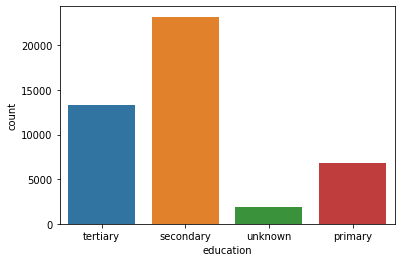

In [1936]:
sns.countplot(BankRaw['education'])
#Inference: Data has more representation of customers with secondary degree, moderate distribution of customers with teriary degree
#and less representation of customers with primary degree and least customers with unknown degree. 
#As the number of unknown is least, we will retain it as it is

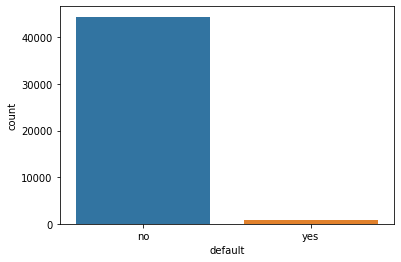

In [1937]:
sns.countplot(BankRaw['default'])
#Inference: Data set has more non-defaulters and very least defaulters

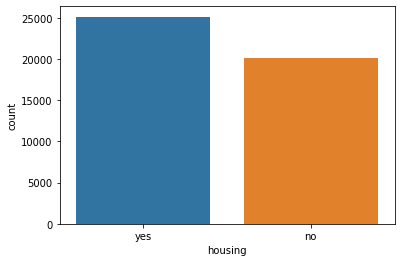

In [1938]:
sns.countplot(BankRaw['housing'])
#Inference: Data set has somewhat equal representation of customers with housing loan and without housing loan

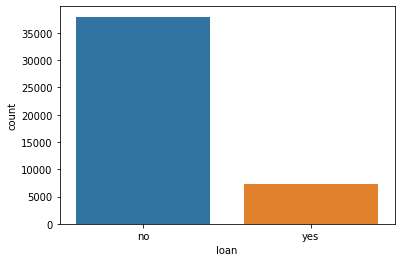

In [1939]:
sns.countplot(BankRaw['loan'])
#Inference: Majority of customers does not have personal loan

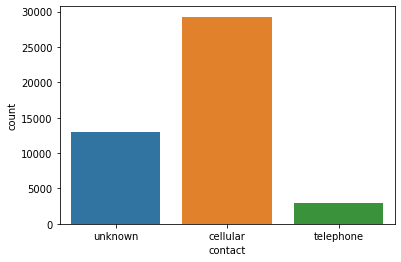

In [1940]:
sns.countplot(BankRaw['contact'])
#Inference: Majority of customers can be contacted with cellular mode in this data set while 
#moderate amount of customers does not have any mode of contact ("Unknown") and least number of customers 
#can be reached over telephone
#We will keep the 'unknown' category as it is since it is more of mode of contact and 
#customers can be contacted through other modes as well if needed(Ex: email,postal address)

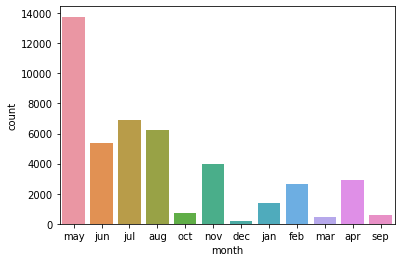

In [1941]:
sns.countplot(BankRaw['month'])
#Inference: Most of the customers in data set were previously contacted in the month of may. 
#Average number of customers were contacted in the month of jun, jul,aug,nov 
#Least number of customers were contacted in the month of oct,dec,jan,feb,mar,apr,sep
#No unknowns found

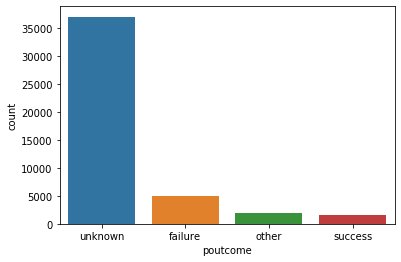

In [1942]:
sns.countplot(BankRaw['poutcome'])
#Inference: poutcome (outcome of previous campaign) is unknown across majority of data set and 
#has smaller presence among failure,other and success categories. 
#This data may not add much value from analysis perspective as for most of the customers it is unknown

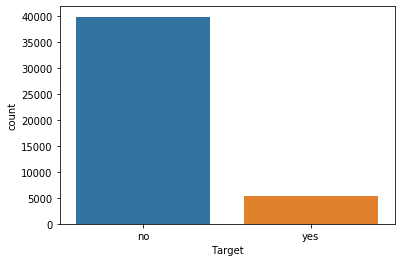

In [1943]:
sns.countplot(BankRaw['Target'])
#Inference: Data set has majority of the customers who has not opted for term deposit

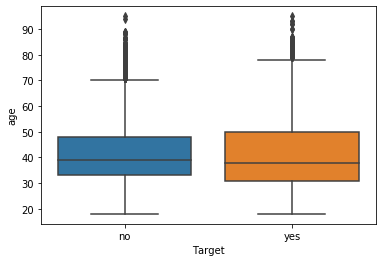

In [1944]:
#Bivariate Analysis
sns.boxplot(BankRaw['Target'],BankRaw['age'])
#Inference: Target column is heavily spread between age group 30-50. 
#Also there is equal representation of customers who opted for Term deposit and did not opt for it

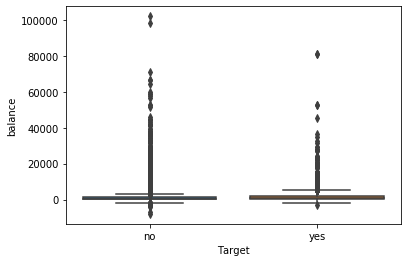

In [1945]:
#Bivariate Analysis
sns.boxplot(BankRaw['Target'],BankRaw['balance'])
#Inference: There is equal distribution of Customers who opted for 'Term deposit' and who has not opted
# and this distribution can be found between salary range less that ~15000

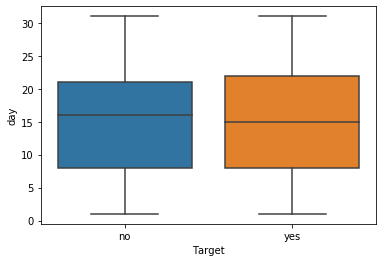

In [1946]:
#Bivariate Analysis
sns.boxplot(BankRaw['Target'],BankRaw['day'])
#Inference: There is equal distribution of Customers who opted for 'Term deposit' and who has not opted
# and distribution is concentrated between 8th-22nd day of month

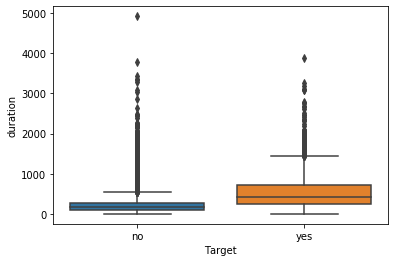

In [1947]:
#Bivariate Analysis
sns.boxplot(BankRaw['Target'],BankRaw['duration'])
#Inference: The customer who opted for Term deposit and the one's who slightly spend more duration in last call

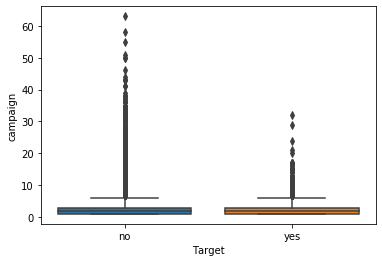

In [1948]:
#Bivariate Analysis
sns.boxplot(BankRaw['Target'],BankRaw['campaign'])
#Inference:There is equal distribution of customers who opted for Term Deposit and not opted w.r.t campaign

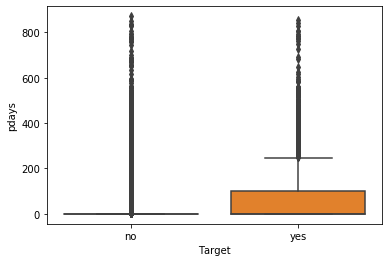

In [1949]:
#Bivariate Analysis
sns.boxplot(BankRaw['Target'],BankRaw['pdays'])
#Inference: As per the below distribution, the customers who has opted for Term deposit were contacted recently

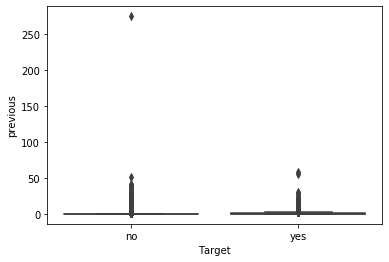

In [1950]:
#Bivariate Analysis
sns.boxplot(BankRaw['Target'],BankRaw['previous'])
#Inference: Customers who opted for Term deposit and not opted have equal distribution w.r.t previous contact

In [1951]:
#Take appropriate actions for outliers and -ve values

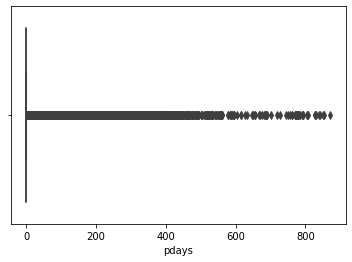

In [1952]:
#Continuing with outliers analysis further
sns.boxplot(BankRaw['pdays'])
#From below graph, the data does not seems to be correct. Needs further analysis

In [1953]:
BankRaw[BankRaw['pdays']<0].count()
#Inference: There are 36954 rows where the pdays is -ve. Let's analyse it further

age          36954
job          36954
marital      36954
education    36954
default      36954
balance      36954
housing      36954
loan         36954
contact      36954
day          36954
month        36954
duration     36954
campaign     36954
pdays        36954
previous     36954
poutcome     36954
Target       36954
dtype: int64

In [1954]:
BankRaw[BankRaw['pdays']<0].describe().transpose()
#Inference: From below data we can see that for all -ve value of 'pdays', the 'previous' value is 0, which means 
#customers was not previously contacted. Hence my previous assumption around -1 value of pdays holds good 
# i.e., 'pdays' = '-ve' means customers was not previously contacted. 
#We will replace this -ve value with 0 for now so that we can proceed with assumption that these are the customers 
# not contacted previusly and hence pdays is also 0 
#Note: We cannot replace it with 25%, median and 75% value as all are -1 in this case

,count,mean,std,min,25%,50%,75%,max
age,36954.0,40.932430,10.430218,18.0,33.0,39.0,49.0,95.0
balance,36954.0,1318.788846,3039.557077,-8019.0,55.0,414.0,1358.0,102127.0
day,36954.0,16.145424,8.372554,1.0,9.0,17.0,22.0,31.0
duration,36954.0,257.726119,262.256406,0.0,101.0,177.0,318.0,4918.0
campaign,36954.0,2.921957,3.325791,1.0,1.0,2.0,3.0,63.0
pdays,36954.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0
previous,36954.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [1955]:
BankRaw.pdays.median(),BankRaw.pdays.describe().transpose()

(-1.0, count    45211.000000
 mean        40.197828
 std        100.128746
 min         -1.000000
 25%         -1.000000
 50%         -1.000000
 75%         -1.000000
 max        871.000000
 Name: pdays, dtype: float64)

In [1956]:
BankRaw["pdays"]=np.where(BankRaw["pdays"]<0, 0,BankRaw['pdays'])
BankRaw.pdays.describe().transpose()
#Inference: 45211 records of data having pdays <0

count    45211.000000
mean        41.015195
std         99.792615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        871.000000
Name: pdays, dtype: float64

In [1957]:
#Outliers treatment for 'pdays'
#In general, a reputed bank will maintain the relationship between customers by contacting them atleast once in 6 months.
#So we can consider anything > 6 months (182 days) as outlier and let's replace those values with this 180 days 
BankRaw["pdays"]=np.where(BankRaw["pdays"]>182, 182,BankRaw['pdays'])
BankRaw.pdays.describe().transpose()
# Inference: We can see that after replacement, std has reduced and replacement is successful

count    45211.000000
mean        28.440579
std         62.910455
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        182.000000
Name: pdays, dtype: float64

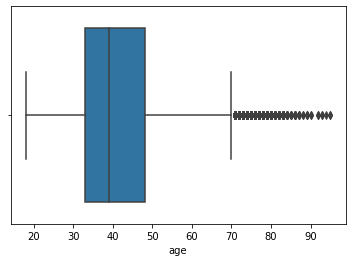

In [1958]:
#Checking the presence of outliers
sns.boxplot(BankRaw['age'])
#From boxplot, we can see the presence of outliers ie.,age>70 needs to be replaced with median value.

In [1959]:
#Replacing the outliers with median value ie., 39 in this case
BankRaw["age"]=np.where(BankRaw["age"]>70, 39,BankRaw['age'])

In [1960]:
#Checking if the outliers is replaced correctly
BankRaw[BankRaw['age']<=70]. describe().transpose()
# We can conclude that  after replacing the outliers, all 45211 records have age <=70

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.528876,9.925626,18.0,33.0,39.0,48.0,70.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,28.440579,62.910455,0.0,0.0,0.0,0.0,182.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


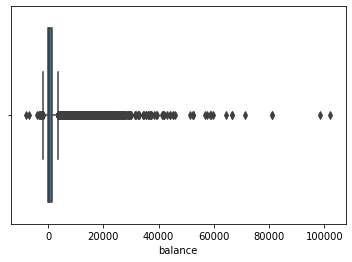

In [1961]:
#Checking the presence of outliers
sns.boxplot(BankRaw['balance'])
#From boxplot, we can see the presence of outliers. Also this has -ve values.
#A balance of negetive value may also be indication of existence of loan

In [1962]:
BankRaw[BankRaw['balance']<0].describe().transpose()
#There are 3766 customer records with -ve balance 

,count,mean,std,min,25%,50%,75%,max
age,3766.0,39.480351,9.068517,20.0,32.0,38.0,46.0,63.0
balance,3766.0,-317.677642,368.994983,-8019.0,-422.0,-230.0,-93.0,-1.0
day,3766.0,16.439724,8.578670,1.0,9.0,16.0,24.0,31.0
duration,3766.0,252.096389,250.280003,4.0,105.0,176.0,305.0,3253.0
campaign,3766.0,2.926713,3.474046,1.0,1.0,2.0,3.0,43.0
pdays,3766.0,22.245884,58.879697,0.0,0.0,0.0,0.0,182.0
previous,3766.0,0.406798,1.609466,0.0,0.0,0.0,0.0,25.0


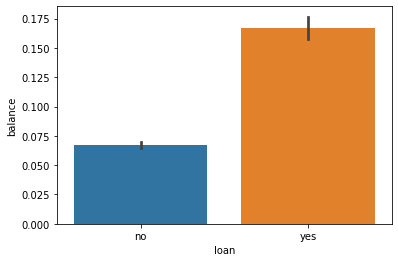

In [1963]:
#Lets analyze 'balance' and 'loan' and housing together as I am suspecting/assuming customers with negetive balance may have
#either housing loan/personal loan
sns.barplot(BankRaw['loan'], BankRaw['balance']<0) 
#Inference: From below graph, it gives sense that more number of customers with balance <0 has opted for loan

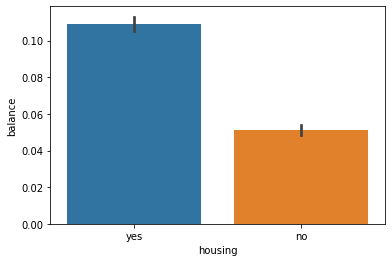

In [1964]:
#Let's perform similar analysis with housing loan as well
sns.barplot(BankRaw['housing'], BankRaw['balance']<0)
# From below graph, it gives sense that more number of customers with balance <0 has opted for housing loan as well
# Overall we can conclude that customers with -ve balance are the ones who opted for either personal loan or housing loan

In [1965]:
#Let's replace the -ve values with 25% for balance 
BankRaw.balance.describe().transpose()
#So 25% value is 72

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [1966]:
BankRaw["balance"]=np.where(BankRaw["balance"]<0, 72,BankRaw['balance'])

In [1967]:
BankRaw.balance.describe().transpose() # the -ve value is replaced successfully

count     45211.000000
mean       1394.731548
std        3026.845286
min           0.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [1968]:
# From boxplot, we could sense that balance also has outliers (i.e balance >5000)hence needs replacement
BankRaw[BankRaw['balance']>5000].describe().transpose()
#There are 2845 records with balance >5000, lets replace this with 75% value i.e., 1428

,count,mean,std,min,25%,50%,75%,max
age,2845.0,42.808436,10.279132,19.0,34.0,41.0,51.0,70.0
balance,2845.0,9826.109666,7263.815214,5003.0,5961.0,7578.0,10758.0,102127.0
day,2845.0,16.099473,7.896902,1.0,9.0,18.0,21.0,31.0
duration,2845.0,276.048858,282.555242,0.0,107.0,189.0,340.0,4918.0
campaign,2845.0,2.666432,3.030578,1.0,1.0,2.0,3.0,63.0
pdays,2845.0,31.634446,63.857502,0.0,0.0,0.0,0.0,182.0
previous,2845.0,0.686116,2.166480,0.0,0.0,0.0,0.0,35.0


In [1969]:
BankRaw["balance"]=np.where(BankRaw["balance"]>5000, 1428,BankRaw['balance'])
BankRaw.balance.describe().transpose() # the outliers are replaced successfully

count    45211.000000
mean       866.262326
std       1044.015957
min          0.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max       5000.000000
Name: balance, dtype: float64

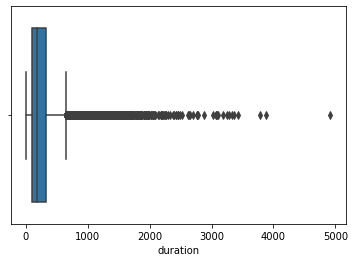

In [1970]:
#Checking the presence of outliers
sns.boxplot(BankRaw['duration'])
#Inference: Presence of outliers confirmed which needs to be treated ideally. However as per the information provided
#in the assignment this variable needs to be ignored during preparing model as it may impact the accuracy of prediction.

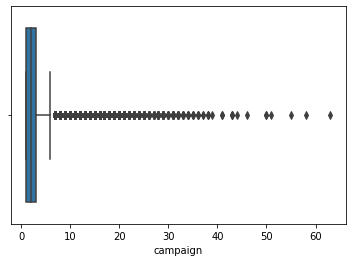

In [1971]:
#Checking the presence of outliers
sns.boxplot(BankRaw['campaign'])
#From boxplot, we can see the presence of outliers which needs to be replaced with median value.

In [1972]:
BankRaw.campaign.describe().transpose()
#Presence of outliers is evident and we can assume campaign >6 as outliers and replace it with 75% value, i.e., 3

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [1973]:
BankRaw["campaign"]=np.where(BankRaw["campaign"]>6, 3,BankRaw['campaign'])
BankRaw.campaign.describe().transpose() # the outliers are replaced successfully

count    45211.000000
mean         2.188914
std          1.289155
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: campaign, dtype: float64

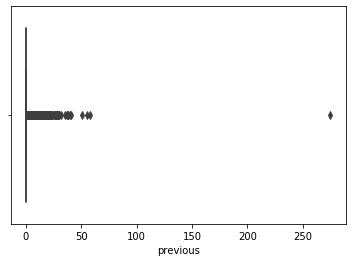

In [1974]:
#Checking the presence of outliers
sns.boxplot(BankRaw['previous'])
#Inference: Too many outliers, needs to be treated

In [1975]:
BankRaw.previous.describe().transpose()
BankRaw[BankRaw['previous']>0].describe().transpose()
#There are 8257 records with previous value >0, which is very small representation
# Let's replace it with median value

,count,mean,std,min,25%,50%,75%,max
age,8257.0,40.127528,10.075831,18.0,33.0,38.0,47.0,70.0
balance,8257.0,992.242340,1077.094304,0.0,168.0,602.0,1428.0,5000.0
day,8257.0,14.289209,7.919176,1.0,7.0,14.0,20.0,31.0
duration,8257.0,260.118687,235.208105,1.0,113.0,193.0,324.0,2219.0
campaign,8257.0,1.924549,1.190543,1.0,1.0,2.0,2.0,6.0
pdays,8257.0,155.725687,42.995481,1.0,133.0,182.0,182.0,182.0
previous,8257.0,3.177546,4.560820,1.0,1.0,2.0,4.0,275.0


In [1976]:
BankRaw.previous.median()#Replacing  outliers with median value 

0.0

In [1977]:
BankRaw["previous"]=np.where(BankRaw["previous"]>0, 0,BankRaw['previous'])
BankRaw.previous.describe().transpose()

count    45211.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64

In [1978]:
BankRaw.describe().transpose()#Verifying if all -ve values and outliers are replaced in data set

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.528876,9.925626,18.0,33.0,39.0,48.0,70.0
balance,45211.0,866.262326,1044.015957,0.0,72.0,448.0,1428.0,5000.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.188914,1.289155,1.0,1.0,2.0,3.0,6.0
pdays,45211.0,28.440579,62.910455,0.0,0.0,0.0,0.0,182.0
previous,45211.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


(False, False, <matplotlib.axes._subplots.AxesSubplot at 0x1bc60dc550>)

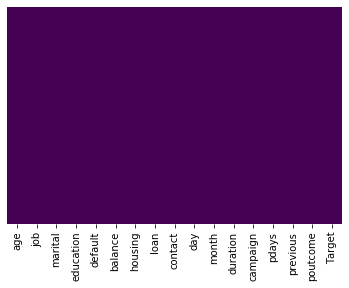

In [1979]:
#Confirming if any na/nan/null values are not added to data set after replacement
BankRaw.isna().sum()
BankRaw.isnull().values.any(),BankRaw.isna().values.any()
BankRaw.isnull().values.any(),BankRaw.isna().values.any(),sns.heatmap(BankRaw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1980]:
#Confirming all columns are present after data treatment
BankRaw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no


In [1981]:
#Check for appropriate data types and make changes if required
#We have categorical values which needs to be represnted in numeric format
#We will use labelling for variables like education, month,default,housing,loan and target as these variables has significance w.r.t sequence/ranking involved
#We will use one-hot encoding for variables like job,marital,contact,poutcome as these variables 
#does not have any significance w.r.t sequence/ranking

In [1982]:
#Labelling the categorical variables
cleanup_nums = { "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown": -1},
                 "housing":       {"no": 0,"yes": 1},
                 "loan":          {"no": 0, "yes": 1},
                 "default":       {"no": 0, "yes": 1},
                 "Target":        {"no": 0, "yes": 1},
                 "month":         {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
                                  "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}}
               


In [1983]:
#Replacing in the data set
BankRaw.replace(cleanup_nums, inplace=True)
BankRaw.head(10)
#Inference: Labelling and replacement is reflecting successfully

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,3,0,2143,1,0,unknown,5,5,261,1,0,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,5,151,1,0,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,5,76,1,0,0,unknown,0
3,47,blue-collar,married,-1,0,1506,1,0,unknown,5,5,92,1,0,0,unknown,0
4,33,unknown,single,-1,0,1,0,0,unknown,5,5,198,1,0,0,unknown,0
5,35,management,married,3,0,231,1,0,unknown,5,5,139,1,0,0,unknown,0
6,28,management,single,3,0,447,1,1,unknown,5,5,217,1,0,0,unknown,0
7,42,entrepreneur,divorced,3,1,2,1,0,unknown,5,5,380,1,0,0,unknown,0
8,58,retired,married,1,0,121,1,0,unknown,5,5,50,1,0,0,unknown,0
9,43,technician,single,2,0,593,1,0,unknown,5,5,55,1,0,0,unknown,0


In [1984]:
#Proceeding with one hot encoding
#from sklearn.feature_extraction.text import CountVectorizer 
oneHotCols= ["job","marital","contact","poutcome"]
BankRaw=pd.get_dummies(BankRaw, columns=oneHotCols)
BankRaw.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,5,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


In [1985]:
BankRaw.info()
#Inference: All categorical values are replaced with numeric values and same is confirmed below
#We are all set to proceed with modelling as all required data treatments are completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
Target               45211 non-null int64
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8
job_self-employed    45211 non-null uint8
job_services         45211 non-null uint8
job_stude

In [1986]:
# Droping duration column as it is highly impacting the accuracy of model (mentioned in the instructions)
Bank=BankRaw.drop('duration',axis=1)

In [1987]:
#Create the training set and test set in ration of 70:30
#Importing required libaries
from sklearn.model_selection import train_test_split
import os
#Drop the target 'Personal Loan' from data
x=Bank.drop('Target',axis=1)
y=Bank['Target']
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=0)
x_train,x_test,y_train,y_test

(       age  education  default  balance  housing  loan  day  month  campaign  \
 24951   58          1        0     1021        0     0   18     11         1   
 22129   55         -1        0      196        0     0   21      8         2   
 986     50          2        0      159        1     0    7      5         2   
 14999   43          1        0     1880        1     0   17      7         6   
 4027    53          3        0      647        1     0   16      5         6   
 ...    ...        ...      ...      ...      ...   ...  ...    ...       ...   
 30403   35          3        0      995        0     0    5      2         1   
 21243   35          3        0      750        1     0   18      8         3   
 42613   35          3        0      323        0     0   11      1         2   
 43567   70          2        0      616        0     0   27      4         2   
 2732    46          2        0       57        1     0   14      5         4   
 
        pdays  ...  marita

In [1988]:
#Do data scaling/Normalization if required
#This is needed we have variables in different scale ex: balance, pdays etc
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [1989]:
#In below steps I will be applying multiple models by fitting train data

In [1990]:
#Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns.  
#Taking the depth of the tree as 5  randomly
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [1991]:
entropy=model_entropy.fit(x_train, y_train)

In [1992]:
#Print the accuracy of the model & print the confusion matrix.
model_entropy.score(x_train, y_train)# performance on train data

1.0

In [1993]:
model_entropy.score(x_test, y_test) # performance on test data indicates the overfitting by ~17%

0.8373636095547037

In [1994]:
# Predicting the Test set results
y_pred = entropy.predict(x_test)
acc_DT = accuracy_score(y_test, y_pred)

In [1995]:
#Printing confusion matrix
from sklearn.metrics import confusion_matrix
cm_entropy= confusion_matrix(y_test, y_pred)
cm_entropy

array([[10824,  1145],
       [ 1061,   534]])

In [1996]:
#Print Classification Report to evaluate model performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
#Inference: Based on below report We could conclude below things:
#1. Model is identifying correctly 90% of customers who may reject the Term Deposit if offerred to them. 
    #Hence model is good in idenifying the customers who may tend to reject the Term Deposit offered as precision and recall is high for value 'O'
#2. Model is identifying correctly 33% as potential customers who may opt for Term Deposit if offered. 
    # Precision and recall value for potential Term Deposit accepters is not that great.


              precision    recall  f1-score   support

           0       0.91      0.90      0.91     11969
           1       0.32      0.33      0.33      1595

    accuracy                           0.84     13564
   macro avg       0.61      0.62      0.62     13564
weighted avg       0.84      0.84      0.84     13564



In [1997]:
#There is a slight overfitting in the model due to which the test accuracy drops by ~17%
#Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [1998]:
y_pred_pruned = clf_pruned.predict(x_test)
preds_pruned_train = clf_pruned.predict(x_train)

In [1999]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))
#Inference: We can observe that at max depth=3, model performance is good and both train and test data 
#shows consistent accuracy of ~89%

0.8902978472427012
0.8944923689449237


In [2000]:
#Lets print confusion matrix and check
#Printing confusion matrix
from sklearn.metrics import confusion_matrix
cm_entropy_pruned= confusion_matrix(y_test, y_pred_pruned)
cm_entropy_pruned

array([[11796,   173],
       [ 1315,   280]])

In [2001]:
#Print Classification Report to evaluate model performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_pruned))
#Inference: Based on below report We could conclude below things:
#1. Model is identifying correctly 99% of customers who may reject the Term Deposit if offerred to them. 
    #Hence model is good in idenifying the customers who may tend to reject the Term Deposit offered as precision and recall is high for value 'O'
#2. Model is identifying correctly 18% as potential customers who may opt for Term Deposit if offered. 
    # Precision and recall value for potential Term Deposit accepters is not that great.


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.62      0.18      0.27      1595

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



In [2020]:
acc_DT = accuracy_score(y_test, y_pred_pruned)

In [2003]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.890298


In [2004]:
#Apply the Random forest model and print the accuracy of Random forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [2005]:
rfcl.score(x_train, y_train),rfcl.score(x_test, y_test)
#The model is overfitting by ~10%. Lets print confusion matrix

(0.9989256485606851, 0.8905927455028015)

In [2006]:
#Printing confusion matrix
y_pred = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, y_pred)
from sklearn.metrics import confusion_matrix
cm_RFCL = confusion_matrix(y_test, y_pred)
cm_RFCL

array([[11756,   213],
       [ 1271,   324]])

In [2007]:
#Print Classification Report to evaluate model performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
#Inference: Based on below report We could conclude below things:
#1. Model is identifying correctly 98% of customers who may reject the Term Deposit if offerred to them. 
    #Hence model is good in idenifying the customers who may tend to reject the Term Deposit offered as precision and recall is high for value 'O'
#2. Model is identifying correctly 20%% as potential customers who may opt for Term Deposit if offered. 
    # Precision and recall value for potential Term Deposit accepters is not that great.

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.60      0.20      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [2008]:
#Storing results in table for further comparision
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.890298
0,Random Forest,0.890593


In [2009]:
#Apply Bagging Classifier Algorithm and print the accuracy.

In [2010]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)

In [2011]:
#Checking if the model is overfitting
bgcl.score(x_train, y_train),rfcl.score(x_test, y_test)
#The model is overfitting by ~9%. Lets print confusion matrix

(0.9824311941100262, 0.8905927455028015)

In [2012]:
#Printing confusion matrix
y_pred =bgcl.predict(x_test)
acc_BG = accuracy_score(y_test, y_pred)
from sklearn.metrics import confusion_matrix
cm_bgcl = confusion_matrix(y_test, y_pred)
cm_bgcl

array([[11675,   294],
       [ 1200,   395]])

In [2013]:
#Print Classification Report to evaluate the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
#Inference: Based on below report We could conclude below things:
#1. Model is identifying correctly 98% of customers who may reject the Term Deposit if offerred to them. 
    #Hence model is good in idenifying the customers who may tend to reject the Term Deposit offered as precision and recall is high for value 'O'
#2. Model is identifying correctly 25% as potential customers who may opt for Term Deposit if offered. 
    # Precision and recall value for potential Term Deposit accepters is not that great.

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11969
           1       0.57      0.25      0.35      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [2014]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.890298
0,Random Forest,0.890593
0,Bagging,0.889855


In [2015]:
# Apply GradientBoost Classifier Algorithm for the same data and print the accuracy
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

In [2016]:
#Checking if the model is overfitting
gbcl.score(x_train, y_train),gbcl.score(x_test, y_test)
#From below score we can conclude that model is not overfitting

(0.8963566846778526, 0.8921409613683279)

In [2017]:
#Printing confusion matrix
y_pred =gbcl.predict(x_test)
acc_GB = accuracy_score(y_test, y_pred)
from sklearn.metrics import confusion_matrix
cm_gbcl = confusion_matrix(y_test, y_pred)
cm_gbcl

array([[11816,   153],
       [ 1310,   285]])

In [2018]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
#Inference: Based on below report We could conclude below things:
#1. Model is identifying correctly 99% of customers who may reject the Term Deposit if offerred to them. 
    #Hence model is good in idenifying the customers who may tend to reject the Term Deposit offered as precision and recall is high for value 'O'
#2. Model is identifying correctly 18%% as potential customers who may opt for Term Deposit if offered. 
    # Precision and recall value for potential Term Deposit accepters is not that great.

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.65      0.18      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



In [2019]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.890298
0,Random Forest,0.890593
0,Bagging,0.889855
0,Gradient Boost,0.892141


In [1911]:
#Overall Conclusion:
#From the above analysis, I feel that Gradient Booster seems to be comparatively good model for below reasons:
# 1. It has 0% overfitting/underfitting as ~0% bias/variance  is observed across train data and test data and accuracy is also same (ie., 89%)
# 2. Overall model accuracy is 89.21% which is compartively more than any other model:Decision Tree, Random Forest, Bagger present above
# 3. Eventhough recall in identifying customers who may opt for Term Deposit is slightly less (18%), precision  is more 65% for it
# compared to any other model
#4. This model is consistent and accurate in identifying the customers who may not opt for Term Deposit (precision 90%, recall 99%)
# compared to any other model
